In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, timedelta
from yahoo_fin.stock_info import get_data
from scipy.optimize import minimize
import math
from scipy import optimize 

### 20 largest Nasdaq component stocks
#### 1. Apple
#### 2. Microsoft
#### 3. Amazon
#### 4. Alphabet A
#### 5. Tesla
#### 6. Alphabet B
#### 7. Tesla
#### 8. Nvidia
#### 9. Paypal
#### 10. Comcast
#### 11. Adobe
#### 12. Intel
#### 13. Cisco
#### 14. Netflix
#### 15. Pepsi
#### 16. Broadcom
#### 17. Tmobile
#### 18. Texas Instrument
#### 19. Costco
#### 20. Qualcomm

### Loading all 20 Daily Stock Data (3yrs, 2018 - 2020)

In [2]:
aapl = pd.read_csv("BATS_AAPL, 1D.csv")
aapl = aapl.iloc[:,[0,4]]
aapl['time'] = aapl['time'].astype('datetime64[s]')
aapl['time'] = pd.to_datetime(aapl["time"].dt.strftime('%Y-%m-%d'))
mask = (aapl['time'] > "2018-01-01") & (aapl['time'] <= "2020-12-31")
aapl = aapl.loc[mask]
aapl = aapl['close'].to_numpy()

adbe = pd.read_csv("BATS_ADBE, 1D.csv")
adbe = adbe.iloc[:,[0,4]]
adbe['time'] = adbe['time'].astype('datetime64[s]')
adbe['time'] = pd.to_datetime(adbe["time"].dt.strftime('%Y-%m-%d'))
mask = (adbe['time'] > "2018-01-01") & (adbe['time'] <= "2020-12-31")
adbe = adbe.loc[mask]
adbe = adbe['close'].to_numpy()

amzn = pd.read_csv("BATS_AMZN, 1D.csv")
amzn = amzn.iloc[:,[0,4]]
amzn['time'] = amzn['time'].astype('datetime64[s]')
amzn['time'] = pd.to_datetime(amzn["time"].dt.strftime('%Y-%m-%d'))
mask = (amzn['time'] > "2018-01-01") & (amzn['time'] <= "2020-12-31")
amzn = amzn.loc[mask]
amzn = amzn['close'].to_numpy()

avgo = pd.read_csv("BATS_AVGO, 1D.csv")
avgo = avgo.iloc[:,[0,4]]
avgo['time'] = avgo['time'].astype('datetime64[s]')
avgo['time'] = pd.to_datetime(avgo["time"].dt.strftime('%Y-%m-%d'))
mask = (avgo['time'] > "2018-01-01") & (avgo['time'] <= "2020-12-31")
avgo = avgo.loc[mask]
avgo = avgo['close'].to_numpy()

cmcsa = pd.read_csv("BATS_CMCSA, 1D.csv")
cmcsa = cmcsa.iloc[:,[0,4]]
cmcsa['time'] = cmcsa['time'].astype('datetime64[s]')
cmcsa['time'] = pd.to_datetime(cmcsa["time"].dt.strftime('%Y-%m-%d'))
mask = (cmcsa['time'] > "2018-01-01") & (cmcsa['time'] <= "2020-12-31")
cmcsa = cmcsa.loc[mask]
cmcsa = cmcsa['close'].to_numpy()

cost = pd.read_csv("BATS_COST, 1D.csv")
cost = cost.iloc[:,[0,4]]
cost['time'] = cost['time'].astype('datetime64[s]')
cost['time'] = pd.to_datetime(cost["time"].dt.strftime('%Y-%m-%d'))
mask = (cost['time'] > "2018-01-01") & (cost['time'] <= "2020-12-31")
cost = cost.loc[mask]
cost = cost['close'].to_numpy()

csco = pd.read_csv("BATS_CSCO, 1D.csv")
csco = csco.iloc[:,[0,4]]
csco['time'] = csco['time'].astype('datetime64[s]')
csco['time'] = pd.to_datetime(csco["time"].dt.strftime('%Y-%m-%d'))
mask = (csco['time'] > "2018-01-01") & (csco['time'] <= "2020-12-31")
csco = csco.loc[mask]
csco = csco['close'].to_numpy()

fb = pd.read_csv("BATS_FB, 1D.csv")
fb = fb.iloc[:,[0,4]]
fb['time'] = fb['time'].astype('datetime64[s]')
fb['time'] = pd.to_datetime(fb["time"].dt.strftime('%Y-%m-%d'))
mask = (fb['time'] > "2018-01-01") & (fb['time'] <= "2020-12-31")
fb = fb.loc[mask]
fb = fb['close'].to_numpy()

goog = pd.read_csv("BATS_GOOG, 1D.csv")
goog = goog.iloc[:,[0,4]]
goog['time'] = goog['time'].astype('datetime64[s]')
goog['time'] = pd.to_datetime(goog["time"].dt.strftime('%Y-%m-%d'))
mask = (goog['time'] > "2018-01-01") & (goog['time'] <= "2020-12-31")
goog = goog.loc[mask]
goog = goog['close'].to_numpy()

googl = pd.read_csv("BATS_GOOGL, 1D.csv")
googl = googl.iloc[:,[0,4]]
googl['time'] = googl['time'].astype('datetime64[s]')
googl['time'] = pd.to_datetime(googl["time"].dt.strftime('%Y-%m-%d'))
mask = (googl['time'] > "2018-01-01") & (googl['time'] <= "2020-12-31")
googl = googl.loc[mask]
googl = googl['close'].to_numpy()

intc = pd.read_csv("BATS_INTC, 1D.csv")
intc = intc.iloc[:,[0,4]]
intc['time'] = intc['time'].astype('datetime64[s]')
intc['time'] = pd.to_datetime(intc["time"].dt.strftime('%Y-%m-%d'))
mask = (intc['time'] > "2018-01-01") & (intc['time'] <= "2020-12-31")
intc = intc.loc[mask]
intc = intc['close'].to_numpy()

msft = pd.read_csv("BATS_MSFT, 1D.csv")
msft = msft.iloc[:,[0,4]]
msft['time'] = msft['time'].astype('datetime64[s]')
msft['time'] = pd.to_datetime(msft["time"].dt.strftime('%Y-%m-%d'))
mask = (msft['time'] > "2018-01-01") & (msft['time'] <= "2020-12-31")
msft = msft.loc[mask]
msft = msft['close'].to_numpy()

nflx = pd.read_csv("BATS_NFLX, 1D.csv")
nflx = nflx.iloc[:,[0,4]]
nflx['time'] = nflx['time'].astype('datetime64[s]')
nflx['time'] = pd.to_datetime(nflx["time"].dt.strftime('%Y-%m-%d'))
mask = (nflx['time'] > "2018-01-01") & (nflx['time'] <= "2020-12-31")
nflx = nflx.loc[mask]
nflx = nflx['close'].to_numpy()

nvda = pd.read_csv("BATS_NVDA, 1D.csv")
nvda = nvda.iloc[:,[0,4]]
nvda['time'] = nvda['time'].astype('datetime64[s]')
nvda['time'] = pd.to_datetime(nvda["time"].dt.strftime('%Y-%m-%d'))
mask = (nvda['time'] > "2018-01-01") & (nvda['time'] <= "2020-12-31")
nvda = nvda.loc[mask]
nvda = nvda['close'].to_numpy()

pep = pd.read_csv("BATS_PEP, 1D.csv")
pep = pep.iloc[:,[0,4]]
pep['time'] = pep['time'].astype('datetime64[s]')
pep['time'] = pd.to_datetime(pep["time"].dt.strftime('%Y-%m-%d'))
mask = (pep['time'] > "2018-01-01") & (pep['time'] <= "2020-12-31")
pep = pep.loc[mask]
pep = pep['close'].to_numpy()

pypl = pd.read_csv("BATS_PYPL, 1D.csv")
pypl = pypl.iloc[:,[0,4]]
pypl['time'] = pypl['time'].astype('datetime64[s]')
pypl['time'] = pd.to_datetime(pypl["time"].dt.strftime('%Y-%m-%d'))
mask = (pypl['time'] > "2018-01-01") & (pypl['time'] <= "2020-12-31")
pypl = pypl.loc[mask]
pypl = pypl['close'].to_numpy()

qcom = pd.read_csv("BATS_QCOM, 1D.csv")
qcom = qcom.iloc[:,[0,4]]
qcom['time'] = qcom['time'].astype('datetime64[s]')
qcom['time'] = pd.to_datetime(qcom["time"].dt.strftime('%Y-%m-%d'))
mask = (qcom['time'] > "2018-01-01") & (qcom['time'] <= "2020-12-31")
qcom = qcom.loc[mask]
qcom = qcom['close'].to_numpy()

tmus = pd.read_csv("BATS_TMUS, 1D.csv")
tmus = tmus.iloc[:,[0,4]]
tmus['time'] = tmus['time'].astype('datetime64[s]')
tmus['time'] = pd.to_datetime(tmus["time"].dt.strftime('%Y-%m-%d'))
mask = (tmus['time'] > "2018-01-01") & (tmus['time'] <= "2020-12-31")
tmus = tmus.loc[mask]
tmus = tmus['close'].to_numpy()

tsla = pd.read_csv("BATS_TSLA, 1D.csv")
tsla = tsla.iloc[:,[0,4]]
tsla['time'] = tsla['time'].astype('datetime64[s]')
tsla['time'] = pd.to_datetime(tsla["time"].dt.strftime('%Y-%m-%d'))
mask = (tsla['time'] > "2018-01-01") & (tsla['time'] <= "2020-12-31")
tsla = tsla.loc[mask]
tsla = tsla['close'].to_numpy()

txn = pd.read_csv("BATS_TXN, 1D.csv")
txn = txn.iloc[:,[0,4]]
txn['time'] = txn['time'].astype('datetime64[s]')
txn['time'] = pd.to_datetime(txn["time"].dt.strftime('%Y-%m-%d'))
mask = (txn['time'] > "2018-01-01") & (txn['time'] <= "2020-12-31")
txn = txn.loc[mask]
txn = txn['close'].to_numpy()


In [6]:
goog.shape

(756,)

In [3]:
slist = ['AAPL', 'ADBE', 'AMZN', 'AVGO', 'CMCSA', 'COST', 'CSCO', 'FB', 'GOOG', 'GOOGL', 'INTC', 'MSFT', 'NFLX', 
         'NVDA', 'PEP', 'PYPL', 'QCOM', 'TMUS', 'TSLA', 'TXN']

print(len(slist))

slist_df = list(map(str.lower,slist))
print(slist_df)


20
['aapl', 'adbe', 'amzn', 'avgo', 'cmcsa', 'cost', 'csco', 'fb', 'goog', 'googl', 'intc', 'msft', 'nflx', 'nvda', 'pep', 'pypl', 'qcom', 'tmus', 'tsla', 'txn']


In [4]:
data = pd.DataFrame() 

for name in slist_df:
    data[name] = globals()[name].tolist()


In [9]:
data

,aapl,adbe,amzn,avgo,cmcsa,cost,csco,fb,goog,googl,intc,msft,nflx,nvda,pep,pypl,qcom,tmus,tsla,txn
0,43.0650,177.70,1189.01,267.01,41.07,188.32,38.86,181.42,1065.00,1073.21,46.85,85.95,201.07,199.35,118.06,73.84,65.20,64.04,64.106,105.57
1,43.0575,181.04,1204.20,269.93,40.41,190.58,39.17,184.67,1082.48,1091.52,45.26,86.35,205.05,212.47,117.75,76.75,65.94,63.61,63.450,108.43
2,43.2575,183.22,1209.59,270.02,40.67,189.10,38.99,184.33,1086.40,1095.76,44.43,87.11,205.63,213.59,118.33,76.73,66.03,63.00,62.924,108.29
3,43.7500,185.34,1229.14,271.62,41.04,187.75,39.53,186.85,1102.23,1110.29,44.74,88.19,209.99,215.40,118.67,78.70,66.47,64.60,63.316,109.12
4,43.5875,185.04,1246.87,272.27,40.48,188.48,39.94,188.28,1106.94,1114.21,44.74,88.28,212.05,222.00,117.99,79.05,66.27,65.10,67.282,109.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,131.9700,499.86,3172.69,431.46,50.38,364.58,44.54,267.40,1738.85,1734.16,47.07,222.75,513.97,519.75,145.06,238.64,148.79,132.92,661.770,161.64
752,136.6900,498.95,3283.96,431.88,51.11,371.06,44.92,277.00,1776.09,1773.96,47.07,224.96,519.12,516.00,146.91,235.73,147.74,133.00,663.690,161.47
753,134.8700,502.11,3322.00,429.04,51.55,372.72,44.64,276.78,1758.72,1757.76,49.39,224.15,530.87,517.73,147.42,231.03,148.49,133.14,665.990,161.18
754,133.7200,497.45,3285.85,434.83,51.21,374.45,44.48,271.87,1739.52,1736.25,48.75,221.68,524.59,525.83,147.31,231.51,149.95,133.28,694.780,162.70


### Calculate RISK and RETURN (based on historical 3 years data) for each stock

In [5]:
annualriskfreerate = (0.0089+0.0214+0.0291)/3  #Average Treasury rate for 2018 - 2020
#. https://www.macrotrends.net/2016/10-year-treasury-bond-rate-yield-chart
print(annualriskfreerate)

dailyriskfreerate = (1 + annualriskfreerate)**(1/756)-1   # 756 trading days in 2018-2020
print(dailyriskfreerate)

0.0198
2.5934899318125204e-05


In [6]:
def get_risk(prices):
    return (prices / prices.shift(1) - 1).dropna().std().values

def get_return(prices):
    return ((prices / prices.shift(1) - 1) - dailyriskfreerate).dropna().mean().values

In [7]:
datadiff = data / data.shift(1) - 1
datadiff

,aapl,adbe,amzn,avgo,cmcsa,cost,csco,fb,goog,googl,intc,msft,nflx,nvda,pep,pypl,qcom,tmus,tsla,txn
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000174,0.018796,0.012775,0.010936,-0.016070,0.012001,0.007977,0.017914,0.016413,0.017061,-0.033938,0.004654,0.019794,0.065814,-0.002626,0.039410,0.011350,-0.006715,-0.010233,0.027091
2,0.004645,0.012042,0.004476,0.000333,0.006434,-0.007766,-0.004595,-0.001841,0.003621,0.003884,-0.018338,0.008801,0.002829,0.005271,0.004926,-0.000261,0.001365,-0.009590,-0.008290,-0.001291
3,0.011385,0.011571,0.016163,0.005925,0.009098,-0.007139,0.013850,0.013671,0.014571,0.013260,0.006977,0.012398,0.021203,0.008474,0.002873,0.025674,0.006664,0.025397,0.006230,0.007665
4,-0.003714,-0.001619,0.014425,0.002393,-0.013645,0.003888,0.010372,0.007653,0.004273,0.003531,0.000000,0.001021,0.009810,0.030641,-0.005730,0.004447,-0.003009,0.007740,0.062638,0.004765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.007712,0.005937,-0.003949,0.014102,0.006895,0.007433,0.003718,-0.002648,0.003735,0.003431,0.010737,0.007827,-0.000991,-0.001191,0.004501,-0.003341,0.012452,0.005218,0.024443,0.004100
752,0.035766,-0.001821,0.035071,0.000973,0.014490,0.017774,0.008532,0.035901,0.021416,0.022951,0.000000,0.009921,0.010020,-0.007215,0.012753,-0.012194,-0.007057,0.000602,0.002901,-0.001052
753,-0.013315,0.006333,0.011584,-0.006576,0.008609,0.004474,-0.006233,-0.000794,-0.009780,-0.009132,0.049288,-0.003601,0.022634,0.003353,0.003472,-0.019938,0.005076,0.001053,0.003465,-0.001796
754,-0.008527,-0.009281,-0.010882,0.013495,-0.006596,0.004642,-0.003584,-0.017740,-0.010917,-0.012237,-0.012958,-0.011019,-0.011830,0.015645,-0.000746,0.002078,0.009832,0.001052,0.043229,0.009430


In [8]:
def f(s):
    return s/s.max()

data.apply(f, axis=0)


,aapl,adbe,amzn,avgo,cmcsa,cost,csco,fb,goog,googl,intc,msft,nflx,nvda,pep,pypl,qcom,tmus,tsla,txn
0,0.315056,0.332896,0.336692,0.609821,0.783779,0.480690,0.669423,0.596953,0.582607,0.588070,0.684241,0.371034,0.361279,0.342244,0.796089,0.303257,0.410579,0.474898,0.090844,0.633369
1,0.315001,0.339153,0.340993,0.616490,0.771183,0.486459,0.674763,0.607647,0.592170,0.598103,0.661019,0.372761,0.368431,0.364768,0.793999,0.315208,0.415239,0.471709,0.089915,0.650528
2,0.316464,0.343237,0.342519,0.616695,0.776145,0.482681,0.671662,0.606528,0.594314,0.600426,0.648897,0.376041,0.369473,0.366691,0.797910,0.315126,0.415806,0.467186,0.089169,0.649688
3,0.320067,0.347209,0.348055,0.620349,0.783206,0.479235,0.680965,0.614820,0.602974,0.608388,0.653425,0.380704,0.377307,0.369798,0.800202,0.323217,0.418577,0.479051,0.089725,0.654668
4,0.318878,0.346647,0.353076,0.621834,0.772519,0.481099,0.688028,0.619526,0.605550,0.610536,0.653425,0.381092,0.381008,0.381129,0.795617,0.324654,0.417317,0.482759,0.095345,0.657787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.965469,0.936418,0.898410,0.985406,0.961450,0.930597,0.767270,0.879866,0.951236,0.950240,0.687454,0.961580,0.923493,0.892305,0.978152,0.980081,0.936965,0.985688,0.937790,0.969762
752,1.000000,0.934713,0.929918,0.986365,0.975382,0.947137,0.773816,0.911454,0.971608,0.972049,0.687454,0.971120,0.932746,0.885867,0.990627,0.968130,0.930353,0.986281,0.940510,0.968743
753,0.986685,0.940633,0.940690,0.979879,0.983779,0.951375,0.768992,0.910730,0.962106,0.963172,0.721338,0.967624,0.953859,0.888837,0.994066,0.948827,0.935076,0.987319,0.943770,0.967003
754,0.978272,0.931903,0.930453,0.993103,0.977290,0.955790,0.766236,0.894574,0.951603,0.951386,0.711991,0.956961,0.942575,0.902743,0.993324,0.950799,0.944270,0.988357,0.984568,0.976122


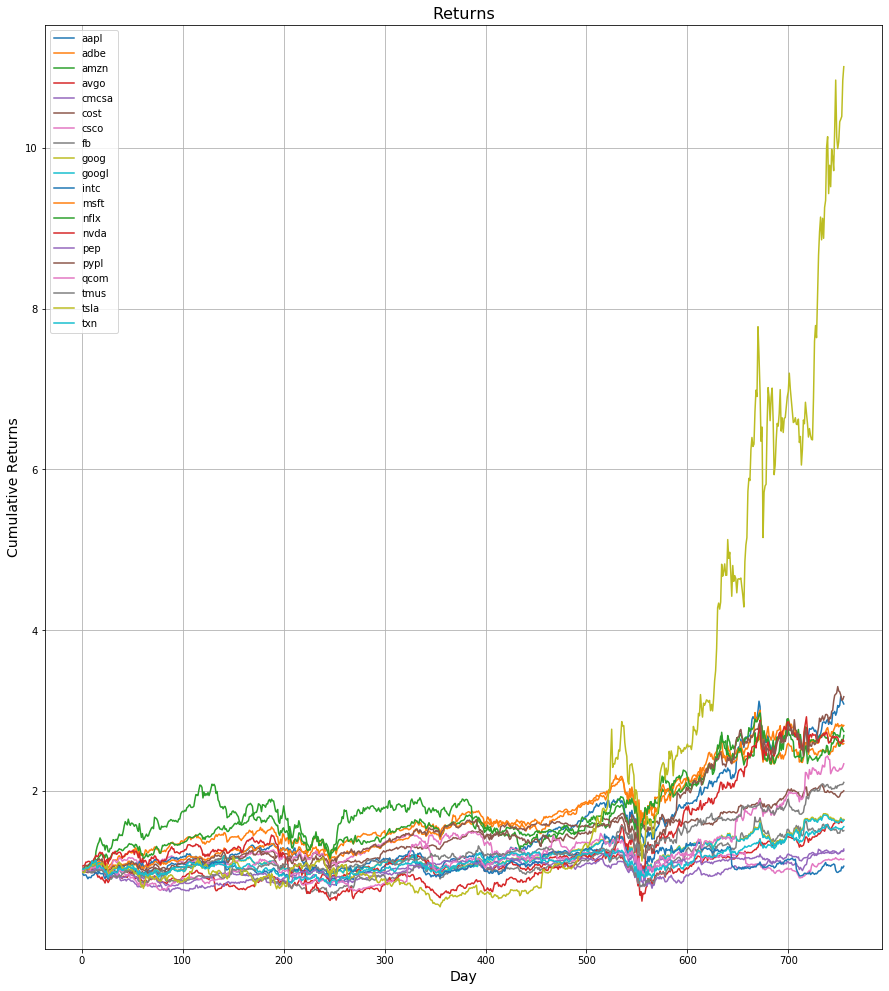

In [27]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(15, 17))

plt.legend()
plt.title("Returns", fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.grid()
plt.show()

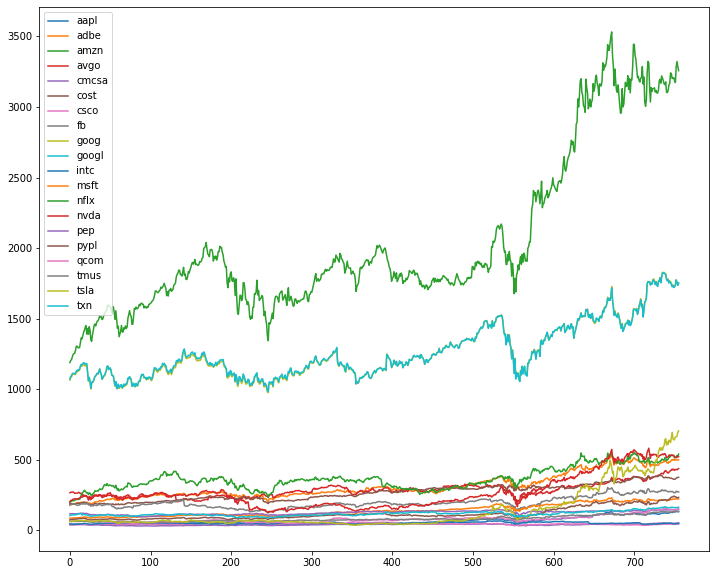

In [28]:
data.plot(figsize=(12,10))

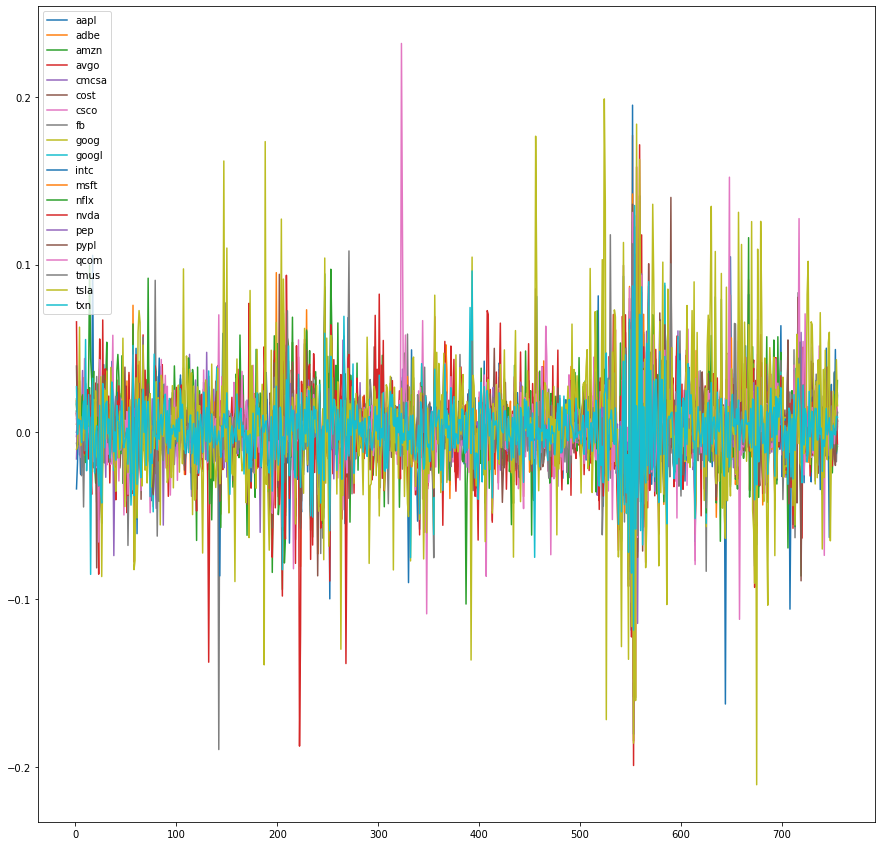

In [31]:
datadiff.plot(figsize=(15,15))

In [9]:
prices = data.dropna()
portfolio_risk = get_risk(prices)
portfolio_return = get_return(prices)

print("Risk : " + str(portfolio_risk))
print("Return : " + str(portfolio_return))

Risk : [0.02212259 0.023343   0.02092308 0.02508949 0.01858533 0.01457158
 0.0200761  0.02394054 0.01938588 0.01936203 0.02502088 0.02032912
 0.02688206 0.03134723 0.01577755 0.02451925 0.02636331 0.01898927
 0.04297777 0.02161059]
Return : [0.00171055 0.00161707 0.00152805 0.00094948 0.00046909 0.00099877
 0.00036307 0.00080631 0.00082159 0.00081169 0.00037062 0.00144087
 0.0016461  0.00174824 0.00040084 0.00180329 0.00144041 0.00114023
 0.00407568 0.00079208]


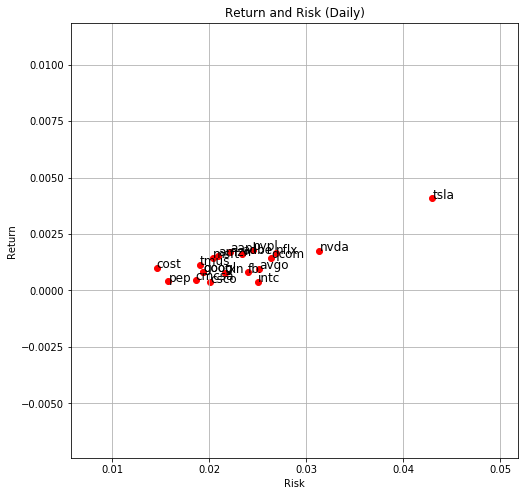

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.scatter(x=portfolio_risk, y=portfolio_return, color='red') 
ax.set(title='Return and Risk (Daily)', xlabel='Risk', ylabel='Return')

#sectors = ['IT', 'HC', 'CD', 'CS', 'F']

for i, name in enumerate(slist_df): 
    ax.annotate(name, (portfolio_risk[i], portfolio_return[i]), fontsize=12)
    
plt.grid()
plt.show()

### Generate random weights for each stock and show the risk-return plot for each random weight combination

In [11]:
normalized_prices = prices / prices.iloc[0, :]
normalized_prices

,aapl,adbe,amzn,avgo,cmcsa,cost,csco,fb,goog,googl,intc,msft,nflx,nvda,pep,pypl,qcom,tmus,tsla,txn
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999826,1.018796,1.012775,1.010936,0.983930,1.012001,1.007977,1.017914,1.016413,1.017061,0.966062,1.004654,1.019794,1.065814,0.997374,1.039410,1.011350,0.993285,0.989767,1.027091
2,1.004470,1.031064,1.017309,1.011273,0.990261,1.004142,1.003345,1.016040,1.020094,1.021012,0.948346,1.013496,1.022679,1.071432,1.002287,1.039139,1.012730,0.983760,0.981562,1.025765
3,1.015906,1.042994,1.033751,1.017265,0.999270,0.996973,1.017241,1.029931,1.034958,1.034551,0.954963,1.026062,1.044363,1.080512,1.005167,1.065818,1.019479,1.008745,0.987677,1.033627
4,1.012133,1.041306,1.048662,1.019700,0.985634,1.000850,1.027792,1.037813,1.039380,1.038203,0.954963,1.027109,1.054608,1.113619,0.999407,1.070558,1.016411,1.016552,1.049543,1.038553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,3.064437,2.812943,2.668346,1.615895,1.226686,1.935960,1.146166,1.473928,1.632723,1.615863,1.004696,2.591623,2.556174,2.607223,1.228697,3.231853,2.282055,2.075578,10.323059,1.531117
752,3.174039,2.807822,2.761928,1.617468,1.244461,1.970370,1.155944,1.526844,1.667690,1.652948,1.004696,2.617336,2.581787,2.588412,1.244367,3.192443,2.265951,2.076827,10.353009,1.529506
753,3.131778,2.825605,2.793921,1.606831,1.255174,1.979184,1.148739,1.525631,1.651380,1.637853,1.054216,2.607912,2.640225,2.597091,1.248687,3.128792,2.277454,2.079013,10.388887,1.526759
754,3.105074,2.799381,2.763518,1.628516,1.246896,1.988371,1.144622,1.498567,1.633352,1.617810,1.040555,2.579174,2.608992,2.637723,1.247755,3.135293,2.299847,2.081199,10.837987,1.541158


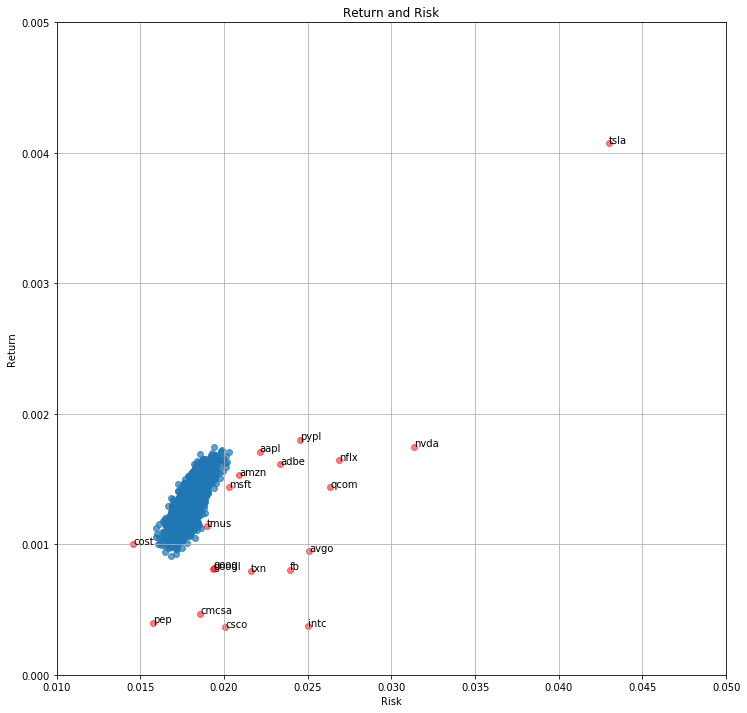

In [12]:
def random_weights(n):
    weights = np.random.rand(n) 
    return weights / sum(weights)

def get_portfolio_risk(weights, normalized_prices): 
    portfolio_val = (normalized_prices * weights).sum(axis=1) 
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    return (portfolio / portfolio.shift(1) -1).dropna().std().values[0]

def get_portfolio_return(weights, normalized_prices): 
    portfolio_val = (normalized_prices * weights).sum(axis=1) 
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val}) 
    ret = get_return(portfolio) 
    return ret[0]

risk_all = []
return_all = [np.array([])]

normalized_prices = prices / prices.iloc[0, :]

for z in range(0, 3000):
    weights = random_weights(20)
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=prices.index, data={'portfolio': portfolio_val})
    risk = get_risk(portfolio)
    ret = get_return(portfolio)
    risk_all = np.append(risk_all, risk) 
    return_all = np.append(return_all, ret) 
    
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
ax.scatter(x=risk_all, y=return_all, alpha=0.7) 
ax.set_xlim([0.01, 0.05])
ax.set_ylim([0, 0.005])
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')

for i, name in enumerate(slist_df): 
    ax.annotate(name, (portfolio_risk[i], portfolio_return[i]))
    
ax.scatter(x=portfolio_risk, y=portfolio_return, alpha=0.5, color='red') 
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return') 
ax.grid()
plt.show()

In [13]:
weights = random_weights(20)
weights

array([0.0361923 , 0.01384894, 0.06290973, 0.07134549, 0.03793333,
       0.06100192, 0.0554714 , 0.06181681, 0.07706624, 0.03475515,
       0.03717941, 0.07606012, 0.05434088, 0.04551623, 0.04101405,
       0.05269824, 0.01516806, 0.0616741 , 0.04953038, 0.05447723])

In [132]:
sum(weights)

0.9999999999999998

### Calculate average historical returns and variance-covariance to generate Sharpe Ratio

In [14]:
daily_returns = prices / prices.shift(1) - 1
daily_returns = daily_returns.iloc[1:,:]
daily_returns

,aapl,adbe,amzn,avgo,cmcsa,cost,csco,fb,goog,googl,intc,msft,nflx,nvda,pep,pypl,qcom,tmus,tsla,txn
1,-0.000174,0.018796,0.012775,0.010936,-0.016070,0.012001,0.007977,0.017914,0.016413,0.017061,-0.033938,0.004654,0.019794,0.065814,-0.002626,0.039410,0.011350,-0.006715,-0.010233,0.027091
2,0.004645,0.012042,0.004476,0.000333,0.006434,-0.007766,-0.004595,-0.001841,0.003621,0.003884,-0.018338,0.008801,0.002829,0.005271,0.004926,-0.000261,0.001365,-0.009590,-0.008290,-0.001291
3,0.011385,0.011571,0.016163,0.005925,0.009098,-0.007139,0.013850,0.013671,0.014571,0.013260,0.006977,0.012398,0.021203,0.008474,0.002873,0.025674,0.006664,0.025397,0.006230,0.007665
4,-0.003714,-0.001619,0.014425,0.002393,-0.013645,0.003888,0.010372,0.007653,0.004273,0.003531,0.000000,0.001021,0.009810,0.030641,-0.005730,0.004447,-0.003009,0.007740,0.062638,0.004765
5,-0.000115,0.008971,0.004676,-0.013847,0.003211,-0.011619,-0.006259,-0.002178,-0.000614,-0.001274,-0.025034,-0.000680,-0.012921,-0.000270,0.000763,0.001771,-0.015090,0.007680,-0.008085,0.006841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.007712,0.005937,-0.003949,0.014102,0.006895,0.007433,0.003718,-0.002648,0.003735,0.003431,0.010737,0.007827,-0.000991,-0.001191,0.004501,-0.003341,0.012452,0.005218,0.024443,0.004100
752,0.035766,-0.001821,0.035071,0.000973,0.014490,0.017774,0.008532,0.035901,0.021416,0.022951,0.000000,0.009921,0.010020,-0.007215,0.012753,-0.012194,-0.007057,0.000602,0.002901,-0.001052
753,-0.013315,0.006333,0.011584,-0.006576,0.008609,0.004474,-0.006233,-0.000794,-0.009780,-0.009132,0.049288,-0.003601,0.022634,0.003353,0.003472,-0.019938,0.005076,0.001053,0.003465,-0.001796
754,-0.008527,-0.009281,-0.010882,0.013495,-0.006596,0.004642,-0.003584,-0.017740,-0.010917,-0.012237,-0.012958,-0.011019,-0.011830,0.015645,-0.000746,0.002078,0.009832,0.001052,0.043229,0.009430


In [15]:
meanReturns = np.mean(daily_returns, axis = 0)
meanReturns

aapl     0.001736
adbe     0.001643
amzn     0.001554
avgo     0.000975
cmcsa    0.000495
cost     0.001025
csco     0.000389
fb       0.000832
goog     0.000848
googl    0.000838
intc     0.000397
msft     0.001467
nflx     0.001672
nvda     0.001774
pep      0.000427
pypl     0.001829
qcom     0.001466
tmus     0.001166
tsla     0.004102
txn      0.000818
dtype: float64

In [48]:
covReturns = np.cov(daily_returns, rowvar=False)
covReturns

array([[0.00048941, 0.00035838, 0.00030355, 0.00034223, 0.00020697,
        0.00018148, 0.00028126, 0.00032875, 0.00029774, 0.00029644,
        0.00032842, 0.00034552, 0.00030179, 0.0004572 , 0.00018595,
        0.00035698, 0.00034342, 0.00020774, 0.00039117, 0.00031573],
       [0.00035838, 0.0005449 , 0.00035478, 0.00032668, 0.00022211,
        0.00019862, 0.00028913, 0.00036013, 0.00033457, 0.0003361 ,
        0.00034722, 0.00040161, 0.00039714, 0.00049887, 0.00018515,
        0.00042394, 0.00033342, 0.00024927, 0.00042737, 0.00032936],
       [0.00030355, 0.00035478, 0.00043778, 0.00024796, 0.00015439,
        0.00016172, 0.00022695, 0.00031673, 0.00027805, 0.00027621,
        0.0002511 , 0.00031277, 0.00037679, 0.00041665, 0.0001172 ,
        0.00032144, 0.0002511 , 0.00018863, 0.00035244, 0.00025357],
       [0.00034223, 0.00032668, 0.00024796, 0.00062948, 0.0002304 ,
        0.00016011, 0.00029251, 0.00028889, 0.00026997, 0.00027243,
        0.00036905, 0.0003248 , 0.00026713, 0

### Optimize weights with Sharpe Ratio as the objective function
#### Algorithm 1: Sequential Least Squares Programming (SLSQP)

In [163]:
def MaximizeSharpeRatioOptmznSLSQP(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    
    # define maximization of Sharpe Ratio using principle of duality
    def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
        xOptimalArray = x
        Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
        expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
        annRisk =   np.sqrt(Risk*756) 
        annRet = 756*np.array(expReturn) 
        maxSharpeRatio = -(annRet)/annRisk 
        return maxSharpeRatio

    #define equality constraint representing fully invested portfolio
    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    
    #define bounds and other parameters
    xinit = np.ones(len(slist_df)) * (1.0 / len(slist_df))
    #init_guess = np.ones(len(sectors)) * (1.0 / len(sectors))
    cons = ({'type': 'eq', 'fun':constraintEq})
    #cons = ({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)})
    bnds = tuple([(0,1) for x in xinit])
    
    #invoke minimize solver
    opt = optimize.minimize (f, xinit, args = (MeanReturns, CovarReturns,\
                             RiskFreeRate, PortfolioSize), method = 'SLSQP', options={'disp': True, 
                                                                                      'ftol': 1e-08, 
                                                                                      'iprint': 1,
                                                                                      'maxiter': 100, 
                                                                                      'eps': 1.4901161193847656e-08, },  \
                             bounds = bnds, constraints = cons, tol = 10**-3)
    

    
    return opt

In [164]:
result = MaximizeSharpeRatioOptmznSLSQP(meanReturns, covReturns, dailyriskfreerate, 20)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3.0193712938660404
            Iterations: 13
            Function evaluations: 292
            Gradient evaluations: 13


In [165]:
result

     fun: -3.0193712938660404
     jac: array([ 1.94907188e-05,  2.50920713e-01,  1.30534172e-05,  9.60284591e-01,
        6.89529598e-01,  4.50015068e-06,  1.22300005e+00,  9.29208338e-01,
        7.72362977e-01,  7.88071603e-01,  1.64138004e+00,  2.88743764e-01,
        1.93715096e-06,  6.58112317e-01,  6.29557103e-01,  2.83718109e-05,
        1.40100896e-01,  4.97698784e-06, -2.65240669e-05,  9.12004858e-01])
 message: 'Optimization terminated successfully.'
    nfev: 292
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([1.17701259e-01, 0.00000000e+00, 8.40934206e-02, 0.00000000e+00,
       0.00000000e+00, 3.45524075e-01, 0.00000000e+00, 4.47914711e-16,
       1.07083066e-17, 3.71492601e-16, 3.85459142e-16, 0.00000000e+00,
       9.79539001e-03, 0.00000000e+00, 0.00000000e+00, 8.53740555e-02,
       0.00000000e+00, 6.73777201e-02, 2.90134079e-01, 0.00000000e+00])

In [166]:
result.x

array([1.17701259e-01, 0.00000000e+00, 8.40934206e-02, 0.00000000e+00,
       0.00000000e+00, 3.45524075e-01, 0.00000000e+00, 4.47914711e-16,
       1.07083066e-17, 3.71492601e-16, 3.85459142e-16, 0.00000000e+00,
       9.79539001e-03, 0.00000000e+00, 0.00000000e+00, 8.53740555e-02,
       0.00000000e+00, 6.73777201e-02, 2.90134079e-01, 0.00000000e+00])

In [167]:
optimized_weights_slsqp = result.x

In [168]:
result.success

True

In [169]:
sum(optimized_best)

1.0000000000000013

In [184]:
rank = pd.DataFrame()

rank['Stock'] = slist
rank['Sharpe Ratio'] = optimized_weights_slsqp

rank


,Stock,Sharpe Ratio
0,AAPL,1.177013e-01
1,ADBE,0.000000e+00
2,AMZN,8.409342e-02
3,AVGO,0.000000e+00
4,CMCSA,0.000000e+00
5,COST,3.455241e-01
6,CSCO,0.000000e+00
7,FB,4.479147e-16
8,GOOG,1.070831e-17
9,GOOGL,3.714926e-16


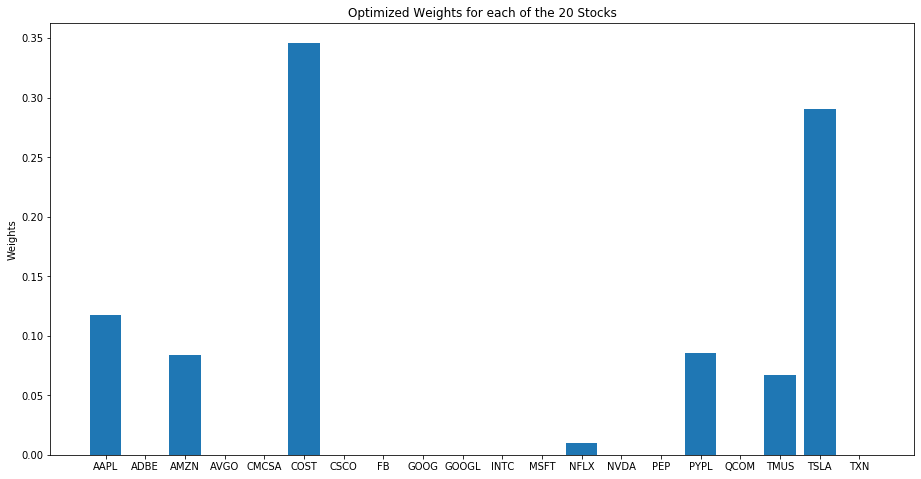

In [180]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_axes([0,0,1,1])
ax.bar(slist,optimized_weights_slsqp)
ax.set_ylabel('Weights')
ax.set_title('Optimized Weights for each of the 20 Stocks')
plt.show()

#### Algorithm 2 : Trust Region with Contraints

In [172]:
def MaximizeSharpeRatioOptmznTRUSTR(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    
    # define maximization of Sharpe Ratio using principle of duality
    def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
        xOptimalArray = x
        Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
        expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
        annRisk =   np.sqrt(Risk*756) 
        annRet = 756*np.array(expReturn) 
        maxSharpeRatio = -(annRet)/annRisk 
        return maxSharpeRatio

    #define equality constraint representing fully invested portfolio
    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    
    #define bounds and other parameters
    xinit = np.ones(len(slist_df)) * (1.0 / len(slist_df))
    #init_guess = np.ones(len(sectors)) * (1.0 / len(sectors))
    cons = ({'type': 'eq', 'fun':constraintEq})
    #cons = ({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)})
    bnds = tuple([(0,1) for x in xinit])
    
    #invoke minimize solver
    
    opt = optimize.minimize (f, xinit, args = (MeanReturns, CovarReturns,\
                             RiskFreeRate, PortfolioSize), method = 'trust-constr', options={'disp': True,
                                                                                      'verbose': 3, 
                                                                                      'maxiter': 1000000000},  \
                             bounds = bnds, constraints = cons, tol = None)
    
    return opt

In [173]:
result = MaximizeSharpeRatioOptmznTRUSTR(meanReturns, covReturns, dailyriskfreerate, 20)

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------------|-------|
|   1   |  21   |   0   | -2.0288e+00 | 1.00e+00 | 1.49e+00 | 2.22e-16 | 1.00e+00 |  1.00e-01   |   0   |
|   2   |  42   |   1   | -3.0553e+00 | 2.00e+00 | 2.30e-01 | 7.35e-02 | 1.00e+00 |  1.00e-01   |   2   |
|   3   |  63   |   3   | -3.2512e+00 | 1.16e+01 | 1.22e-01 | 1.31e-01 | 1.03e+00 |  1.00e-01   |   4   |
|   4   |  84   |   6   | -3.2946e+00 | 1.68e+01 | 3.26e-02 | 4.10e-01 | 1.91e+00 |  1.00e-01   |   4   |
|   5   |  105  |   9   | -3.1715e+00 | 1.68e+01 | 4.31e-02 | 7.14e-02 | 2.97e+00 |  1.00e-01   |   4   |
|   6   |  126  |  11   | -2.9322e+00 | 1.68e+01 | 5.79e-03 | 9.03e-02 | 5.44e+00 |  1.00e-01   |   4   |
|   7   |  126  |  11   | -2.9322e+00 | 8.39e+01 | 2.42e-02 | 9.03e-02 | 1.00e+00 |  2.00e-02   |   0   |
|   8   |  147  |  14   | -3.0298e+00 | 8.39e+

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


|  34   |  651  |  161  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  35   |  672  |  170  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  36   |  693  |  179  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  37   |  714  |  188  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  38   |  735  |  197  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  39   |  756  |  206  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  40   |  777  |  215  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  41   |  798  |  224  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  42   |  819  |  233  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  43   |  840  |  242  | -2.9654e+00 | 2.10e+

|  122  | 2499  |  953  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  123  | 2520  |  962  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  124  | 2541  |  971  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  125  | 2562  |  980  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  126  | 2583  |  989  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  127  | 2604  |  998  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  128  | 2625  | 1007  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  129  | 2646  | 1016  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  130  | 2667  | 1025  | -2.9654e+00 | 2.10e+03 | 7.85e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  131  | 2688  | 1034  | -2.9654e+00 | 2.10e+

|  206  | 4263  | 1709  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  207  | 4284  | 1718  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  208  | 4305  | 1727  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  209  | 4326  | 1736  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  210  | 4347  | 1745  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  211  | 4368  | 1754  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  212  | 4389  | 1763  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  213  | 4410  | 1772  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  214  | 4431  | 1781  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  215  | 4452  | 1790  | -2.9654e+00 | 2.10e+

|  289  | 6006  | 2456  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  290  | 6027  | 2465  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  291  | 6048  | 2474  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  292  | 6069  | 2483  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  293  | 6090  | 2492  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  294  | 6111  | 2501  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  295  | 6132  | 2510  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  296  | 6153  | 2519  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  297  | 6174  | 2528  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  298  | 6195  | 2537  | -2.9654e+00 | 2.10e+

|  367  | 7644  | 3158  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  368  | 7665  | 3167  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  369  | 7686  | 3176  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  370  | 7707  | 3185  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  371  | 7728  | 3194  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  372  | 7749  | 3203  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  373  | 7770  | 3212  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  374  | 7791  | 3221  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  375  | 7812  | 3230  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  376  | 7833  | 3239  | -2.9654e+00 | 2.10e+

|  454  | 9471  | 3941  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  455  | 9492  | 3950  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  456  | 9513  | 3959  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  457  | 9534  | 3968  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  458  | 9555  | 3977  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  459  | 9576  | 3986  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  460  | 9597  | 3995  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  461  | 9618  | 4004  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  462  | 9639  | 4013  | -2.9654e+00 | 2.10e+03 | 7.86e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  463  | 9660  | 4022  | -2.9654e+00 | 2.10e+

|  544  | 11361 | 4751  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  545  | 11382 | 4760  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  546  | 11403 | 4769  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  547  | 11424 | 4778  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  548  | 11445 | 4787  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  549  | 11466 | 4796  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  550  | 11487 | 4805  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  551  | 11508 | 4814  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  552  | 11529 | 4823  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  553  | 11550 | 4832  | -2.9654e+00 | 2.10e+

|  635  | 13272 | 5570  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  636  | 13293 | 5579  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  637  | 13314 | 5588  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  638  | 13335 | 5597  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  639  | 13356 | 5606  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  640  | 13377 | 5615  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  641  | 13398 | 5624  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  642  | 13419 | 5633  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  643  | 13440 | 5642  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  644  | 13461 | 5651  | -2.9654e+00 | 2.10e+

|  726  | 15183 | 6389  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  727  | 15204 | 6398  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  728  | 15225 | 6407  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  729  | 15246 | 6416  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  730  | 15267 | 6425  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  731  | 15288 | 6434  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  732  | 15309 | 6443  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  733  | 15330 | 6452  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  734  | 15351 | 6461  | -2.9654e+00 | 2.10e+03 | 7.87e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  735  | 15372 | 6470  | -2.9654e+00 | 2.10e+

|  815  | 17052 | 7190  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  816  | 17073 | 7199  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  817  | 17094 | 7208  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  818  | 17115 | 7217  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  819  | 17136 | 7226  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  820  | 17157 | 7235  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  821  | 17178 | 7244  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  822  | 17199 | 7253  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  823  | 17220 | 7262  | -2.9654e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  824  | 17241 | 7271  | -2.9654e+00 | 2.10e+

|  908  | 19005 | 8027  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  909  | 19026 | 8036  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  910  | 19047 | 8045  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  911  | 19068 | 8054  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  912  | 19089 | 8063  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  913  | 19110 | 8072  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  914  | 19131 | 8081  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
|  915  | 19152 | 8090  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  916  | 19173 | 8099  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
|  917  | 19194 | 8108  | -2.9655e+00 | 2.10e+

| 1004  | 21021 | 8891  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1005  | 21042 | 8900  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1006  | 21063 | 8909  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1007  | 21084 | 8918  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1008  | 21105 | 8927  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1009  | 21126 | 8936  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1010  | 21147 | 8945  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1011  | 21168 | 8954  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1012  | 21189 | 8963  | -2.9655e+00 | 2.10e+03 | 7.88e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1013  | 21210 | 8972  | -2.9655e+00 | 2.10e+

| 1098  | 22995 | 9737  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1099  | 23016 | 9746  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1100  | 23037 | 9755  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1101  | 23058 | 9764  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1102  | 23079 | 9773  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1103  | 23100 | 9782  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1104  | 23121 | 9791  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1105  | 23142 | 9800  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1106  | 23163 | 9809  | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1107  | 23184 | 9818  | -2.9655e+00 | 2.10e+

| 1191  | 24948 | 10574 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1192  | 24969 | 10583 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1193  | 24990 | 10592 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1194  | 25011 | 10601 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1195  | 25032 | 10610 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1196  | 25053 | 10619 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1197  | 25074 | 10628 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1198  | 25095 | 10637 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1199  | 25116 | 10646 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1200  | 25137 | 10655 | -2.9655e+00 | 2.10e+

| 1286  | 26943 | 11429 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1287  | 26964 | 11438 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1288  | 26985 | 11447 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1289  | 27006 | 11456 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1290  | 27027 | 11465 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1291  | 27048 | 11474 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1292  | 27069 | 11483 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1293  | 27090 | 11492 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1294  | 27111 | 11501 | -2.9655e+00 | 2.10e+03 | 7.89e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1295  | 27132 | 11510 | -2.9655e+00 | 2.10e+

| 1378  | 28875 | 12257 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1379  | 28896 | 12266 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1380  | 28917 | 12275 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1381  | 28938 | 12284 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1382  | 28959 | 12293 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1383  | 28980 | 12302 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1384  | 29001 | 12311 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1385  | 29022 | 12320 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1386  | 29043 | 12329 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1387  | 29064 | 12338 | -2.9655e+00 | 2.10e+

| 1474  | 30891 | 13121 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1475  | 30912 | 13130 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1476  | 30933 | 13139 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1477  | 30954 | 13148 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1478  | 30975 | 13157 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1479  | 30996 | 13166 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1480  | 31017 | 13175 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1481  | 31038 | 13184 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1482  | 31059 | 13193 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1483  | 31080 | 13202 | -2.9655e+00 | 2.10e+

| 1570  | 32907 | 13985 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1571  | 32928 | 13994 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1572  | 32949 | 14003 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1573  | 32970 | 14012 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1574  | 32991 | 14021 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1575  | 33012 | 14030 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1576  | 33033 | 14039 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1577  | 33054 | 14048 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1578  | 33075 | 14057 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1579  | 33096 | 14066 | -2.9655e+00 | 2.10e+

| 1665  | 34902 | 14840 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1666  | 34923 | 14849 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1667  | 34944 | 14858 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1668  | 34965 | 14867 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1669  | 34986 | 14876 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1670  | 35007 | 14885 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1671  | 35028 | 14894 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1672  | 35049 | 14903 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1673  | 35070 | 14912 | -2.9655e+00 | 2.10e+03 | 7.90e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1674  | 35091 | 14921 | -2.9655e+00 | 2.10e+

| 1759  | 36876 | 15686 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1760  | 36897 | 15695 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1761  | 36918 | 15704 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1762  | 36939 | 15713 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1763  | 36960 | 15722 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1764  | 36981 | 15731 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1765  | 37002 | 15740 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1766  | 37023 | 15749 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1767  | 37044 | 15758 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1768  | 37065 | 15767 | -2.9655e+00 | 2.10e+

| 1849  | 38766 | 16496 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1850  | 38787 | 16505 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1851  | 38808 | 16514 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1852  | 38829 | 16523 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1853  | 38850 | 16532 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1854  | 38871 | 16541 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1855  | 38892 | 16550 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1856  | 38913 | 16559 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1857  | 38934 | 16568 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1858  | 38955 | 16577 | -2.9655e+00 | 2.10e+

| 1940  | 40677 | 17315 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1941  | 40698 | 17324 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1942  | 40719 | 17333 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1943  | 40740 | 17342 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1944  | 40761 | 17351 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1945  | 40782 | 17360 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 1946  | 40803 | 17369 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1947  | 40824 | 17378 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1948  | 40845 | 17387 | -2.9655e+00 | 2.10e+03 | 7.91e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 1949  | 40866 | 17396 | -2.9655e+00 | 2.10e+

| 2025  | 42462 | 18080 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2026  | 42483 | 18089 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2027  | 42504 | 18098 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2028  | 42525 | 18107 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2029  | 42546 | 18116 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2030  | 42567 | 18125 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2031  | 42588 | 18134 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2032  | 42609 | 18143 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2033  | 42630 | 18152 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2034  | 42651 | 18161 | -2.9655e+00 | 2.10e+

| 2113  | 44310 | 18872 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2114  | 44331 | 18881 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2115  | 44352 | 18890 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2116  | 44373 | 18899 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2117  | 44394 | 18908 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2118  | 44415 | 18917 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2119  | 44436 | 18926 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2120  | 44457 | 18935 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2121  | 44478 | 18944 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2122  | 44499 | 18953 | -2.9655e+00 | 2.10e+

| 2205  | 46242 | 19700 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2206  | 46263 | 19709 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2207  | 46284 | 19718 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2208  | 46305 | 19727 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2209  | 46326 | 19736 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2210  | 46347 | 19745 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2211  | 46368 | 19754 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2212  | 46389 | 19763 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2213  | 46410 | 19772 | -2.9655e+00 | 2.10e+03 | 7.92e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2214  | 46431 | 19781 | -2.9655e+00 | 2.10e+

| 2301  | 48258 | 20564 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2302  | 48279 | 20573 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2303  | 48300 | 20582 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2304  | 48321 | 20591 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2305  | 48342 | 20600 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2306  | 48363 | 20609 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2307  | 48384 | 20618 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2308  | 48405 | 20627 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2309  | 48426 | 20636 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2310  | 48447 | 20645 | -2.9655e+00 | 2.10e+

| 2396  | 50253 | 21419 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2397  | 50274 | 21428 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2398  | 50295 | 21437 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2399  | 50316 | 21446 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2400  | 50337 | 21455 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2401  | 50358 | 21464 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2402  | 50379 | 21473 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2403  | 50400 | 21482 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2404  | 50421 | 21491 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2405  | 50442 | 21500 | -2.9655e+00 | 2.10e+

| 2492  | 52269 | 22283 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2493  | 52290 | 22292 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2494  | 52311 | 22301 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2495  | 52332 | 22310 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2496  | 52353 | 22319 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2497  | 52374 | 22328 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2498  | 52395 | 22337 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2499  | 52416 | 22346 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2500  | 52437 | 22355 | -2.9655e+00 | 2.10e+03 | 7.93e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2501  | 52458 | 22364 | -2.9655e+00 | 2.10e+

| 2575  | 54012 | 23030 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2576  | 54033 | 23039 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2577  | 54054 | 23048 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2578  | 54075 | 23057 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2579  | 54096 | 23066 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2580  | 54117 | 23075 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2581  | 54138 | 23084 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2582  | 54159 | 23093 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2583  | 54180 | 23102 | -2.9655e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2584  | 54201 | 23111 | -2.9655e+00 | 2.10e+

| 2668  | 55965 | 23867 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2669  | 55986 | 23876 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2670  | 56007 | 23885 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2671  | 56028 | 23894 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2672  | 56049 | 23903 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2673  | 56070 | 23912 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2674  | 56091 | 23921 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2675  | 56112 | 23930 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2676  | 56133 | 23939 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2677  | 56154 | 23948 | -2.9656e+00 | 2.10e+

| 2761  | 57918 | 24704 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2762  | 57939 | 24713 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2763  | 57960 | 24722 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2764  | 57981 | 24731 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2765  | 58002 | 24740 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2766  | 58023 | 24749 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2767  | 58044 | 24758 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2768  | 58065 | 24767 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2769  | 58086 | 24776 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 4.44e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2770  | 58107 | 24785 | -2.9656e+00 | 2.10e+

| 2858  | 59955 | 25577 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2859  | 59976 | 25586 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2860  | 59997 | 25595 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2861  | 60018 | 25604 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2862  | 60039 | 25613 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2863  | 60060 | 25622 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2864  | 60081 | 25631 | -2.9656e+00 | 2.10e+03 | 7.94e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2865  | 60102 | 25640 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2866  | 60123 | 25649 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2867  | 60144 | 25658 | -2.9656e+00 | 2.10e+

| 2950  | 61887 | 26405 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2951  | 61908 | 26414 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2952  | 61929 | 26423 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2953  | 61950 | 26432 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2954  | 61971 | 26441 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2955  | 61992 | 26450 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2956  | 62013 | 26459 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2957  | 62034 | 26468 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 2958  | 62055 | 26477 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 2959  | 62076 | 26486 | -2.9656e+00 | 2.10e+

| 3045  | 63882 | 27260 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3046  | 63903 | 27269 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3047  | 63924 | 27278 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3048  | 63945 | 27287 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3049  | 63966 | 27296 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3050  | 63987 | 27305 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3051  | 64008 | 27314 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3052  | 64029 | 27323 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3053  | 64050 | 27332 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3054  | 64071 | 27341 | -2.9656e+00 | 2.10e+

| 3139  | 65856 | 28106 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3140  | 65877 | 28115 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3141  | 65898 | 28124 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3142  | 65919 | 28133 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3143  | 65940 | 28142 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3144  | 65961 | 28151 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3145  | 65982 | 28160 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3146  | 66003 | 28169 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3147  | 66024 | 28178 | -2.9656e+00 | 2.10e+03 | 7.95e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3148  | 66045 | 28187 | -2.9656e+00 | 2.10e+

| 3235  | 67872 | 28970 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3236  | 67893 | 28979 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3237  | 67914 | 28988 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3238  | 67935 | 28997 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3239  | 67956 | 29006 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3240  | 67977 | 29015 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3241  | 67998 | 29024 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3242  | 68019 | 29033 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3243  | 68040 | 29042 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3244  | 68061 | 29051 | -2.9656e+00 | 2.10e+

| 3330  | 69867 | 29825 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3331  | 69888 | 29834 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3332  | 69909 | 29843 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3333  | 69930 | 29852 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3334  | 69951 | 29861 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3335  | 69972 | 29870 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3336  | 69993 | 29879 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3337  | 70014 | 29888 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3338  | 70035 | 29897 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3339  | 70056 | 29906 | -2.9656e+00 | 2.10e+

| 3425  | 71862 | 30680 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3426  | 71883 | 30689 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3427  | 71904 | 30698 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3428  | 71925 | 30707 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3429  | 71946 | 30716 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3430  | 71967 | 30725 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3431  | 71988 | 30734 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3432  | 72009 | 30743 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3433  | 72030 | 30752 | -2.9656e+00 | 2.10e+03 | 7.96e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3434  | 72051 | 30761 | -2.9656e+00 | 2.10e+

| 3520  | 73857 | 31535 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3521  | 73878 | 31544 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3522  | 73899 | 31553 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3523  | 73920 | 31562 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3524  | 73941 | 31571 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3525  | 73962 | 31580 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3526  | 73983 | 31589 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3527  | 74004 | 31598 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3528  | 74025 | 31607 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3529  | 74046 | 31616 | -2.9656e+00 | 2.10e+

| 3616  | 75873 | 32399 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3617  | 75894 | 32408 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3618  | 75915 | 32417 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3619  | 75936 | 32426 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3620  | 75957 | 32435 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3621  | 75978 | 32444 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3622  | 75999 | 32453 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3623  | 76020 | 32462 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3624  | 76041 | 32471 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3625  | 76062 | 32480 | -2.9656e+00 | 2.10e+

| 3712  | 77889 | 33263 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3713  | 77910 | 33272 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3714  | 77931 | 33281 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3715  | 77952 | 33290 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3716  | 77973 | 33299 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3717  | 77994 | 33308 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3718  | 78015 | 33317 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3719  | 78036 | 33326 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3720  | 78057 | 33335 | -2.9656e+00 | 2.10e+03 | 7.97e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3721  | 78078 | 33344 | -2.9656e+00 | 2.10e+

| 3808  | 79905 | 34127 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3809  | 79926 | 34136 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3810  | 79947 | 34145 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3811  | 79968 | 34154 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3812  | 79989 | 34163 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3813  | 80010 | 34172 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3814  | 80031 | 34181 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3815  | 80052 | 34190 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3816  | 80073 | 34199 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3817  | 80094 | 34208 | -2.9656e+00 | 2.10e+

| 3904  | 81921 | 34991 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3905  | 81942 | 35000 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 3906  | 81963 | 35009 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3907  | 81984 | 35018 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3908  | 82005 | 35027 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3909  | 82026 | 35036 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3910  | 82047 | 35045 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3911  | 82068 | 35054 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3912  | 82089 | 35063 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 3913  | 82110 | 35072 | -2.9656e+00 | 2.10e+

| 4000  | 83937 | 35855 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4001  | 83958 | 35864 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4002  | 83979 | 35873 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4003  | 84000 | 35882 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4004  | 84021 | 35891 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4005  | 84042 | 35900 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4006  | 84063 | 35909 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4007  | 84084 | 35918 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4008  | 84105 | 35927 | -2.9656e+00 | 2.10e+03 | 7.98e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4009  | 84126 | 35936 | -2.9656e+00 | 2.10e+

| 4093  | 85890 | 36692 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4094  | 85911 | 36701 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4095  | 85932 | 36710 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4096  | 85953 | 36719 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4097  | 85974 | 36728 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4098  | 85995 | 36737 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4099  | 86016 | 36746 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4100  | 86037 | 36755 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4101  | 86058 | 36764 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4102  | 86079 | 36773 | -2.9656e+00 | 2.10e+

| 4184  | 87801 | 37511 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4185  | 87822 | 37520 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4186  | 87843 | 37529 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4187  | 87864 | 37538 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4188  | 87885 | 37547 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4189  | 87906 | 37556 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4190  | 87927 | 37565 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4191  | 87948 | 37574 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4192  | 87969 | 37583 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4193  | 87990 | 37592 | -2.9656e+00 | 2.10e+

| 4281  | 89838 | 38384 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4282  | 89859 | 38393 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4283  | 89880 | 38402 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4284  | 89901 | 38411 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4285  | 89922 | 38420 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4286  | 89943 | 38429 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4287  | 89964 | 38438 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4288  | 89985 | 38447 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4289  | 90006 | 38456 | -2.9656e+00 | 2.10e+03 | 7.99e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4290  | 90027 | 38465 | -2.9656e+00 | 2.10e+

| 4374  | 91791 | 39221 | -2.9656e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4375  | 91812 | 39230 | -2.9656e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4376  | 91833 | 39239 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4377  | 91854 | 39248 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4378  | 91875 | 39257 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4379  | 91896 | 39266 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4380  | 91917 | 39275 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4381  | 91938 | 39284 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4382  | 91959 | 39293 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4383  | 91980 | 39302 | -2.9657e+00 | 2.10e+

| 4468  | 93765 | 40067 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4469  | 93786 | 40076 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4470  | 93807 | 40085 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4471  | 93828 | 40094 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4472  | 93849 | 40103 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4473  | 93870 | 40112 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4474  | 93891 | 40121 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4475  | 93912 | 40130 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4476  | 93933 | 40139 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4477  | 93954 | 40148 | -2.9657e+00 | 2.10e+

| 4564  | 95781 | 40931 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4565  | 95802 | 40940 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4566  | 95823 | 40949 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4567  | 95844 | 40958 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4568  | 95865 | 40967 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4569  | 95886 | 40976 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4570  | 95907 | 40985 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4571  | 95928 | 40994 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4572  | 95949 | 41003 | -2.9657e+00 | 2.10e+03 | 8.00e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4573  | 95970 | 41012 | -2.9657e+00 | 2.10e+

| 4658  | 97755 | 41777 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4659  | 97776 | 41786 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4660  | 97797 | 41795 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4661  | 97818 | 41804 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4662  | 97839 | 41813 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4663  | 97860 | 41822 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4664  | 97881 | 41831 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4665  | 97902 | 41840 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4666  | 97923 | 41849 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4667  | 97944 | 41858 | -2.9657e+00 | 2.10e+

| 4752  | 99729 | 42623 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4753  | 99750 | 42632 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4754  | 99771 | 42641 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4755  | 99792 | 42650 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4756  | 99813 | 42659 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4757  | 99834 | 42668 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4758  | 99855 | 42677 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4759  | 99876 | 42686 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4760  | 99897 | 42695 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4761  | 99918 | 42704 | -2.9657e+00 | 2.10e+

| 4846  |101703 | 43469 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4847  |101724 | 43478 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4848  |101745 | 43487 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4849  |101766 | 43496 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4850  |101787 | 43505 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4851  |101808 | 43514 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4852  |101829 | 43523 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4853  |101850 | 43532 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4854  |101871 | 43541 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4855  |101892 | 43550 | -2.9657e+00 | 2.10e+

| 4942  |103719 | 44333 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4943  |103740 | 44342 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4944  |103761 | 44351 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4945  |103782 | 44360 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 4946  |103803 | 44369 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4947  |103824 | 44378 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4948  |103845 | 44387 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4949  |103866 | 44396 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4950  |103887 | 44405 | -2.9657e+00 | 2.10e+03 | 8.01e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 4951  |103908 | 44414 | -2.9657e+00 | 2.10e+

| 5038  |105735 | 45197 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5039  |105756 | 45206 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5040  |105777 | 45215 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5041  |105798 | 45224 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5042  |105819 | 45233 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5043  |105840 | 45242 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5044  |105861 | 45251 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5045  |105882 | 45260 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5046  |105903 | 45269 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5047  |105924 | 45278 | -2.9657e+00 | 2.10e+

| 5130  |107667 | 46025 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5131  |107688 | 46034 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5132  |107709 | 46043 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5133  |107730 | 46052 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5134  |107751 | 46061 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5135  |107772 | 46070 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5136  |107793 | 46079 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5137  |107814 | 46088 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5138  |107835 | 46097 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5139  |107856 | 46106 | -2.9657e+00 | 2.10e+

| 5226  |109683 | 46889 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5227  |109704 | 46898 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5228  |109725 | 46907 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5229  |109746 | 46916 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5230  |109767 | 46925 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5231  |109788 | 46934 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5232  |109809 | 46943 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5233  |109830 | 46952 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5234  |109851 | 46961 | -2.9657e+00 | 2.10e+03 | 8.02e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5235  |109872 | 46970 | -2.9657e+00 | 2.10e+

| 5322  |111699 | 47753 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5323  |111720 | 47762 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5324  |111741 | 47771 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5325  |111762 | 47780 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5326  |111783 | 47789 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5327  |111804 | 47798 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5328  |111825 | 47807 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5329  |111846 | 47816 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5330  |111867 | 47825 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5331  |111888 | 47834 | -2.9657e+00 | 2.10e+

| 5418  |113715 | 48617 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5419  |113736 | 48626 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5420  |113757 | 48635 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5421  |113778 | 48644 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5422  |113799 | 48653 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5423  |113820 | 48662 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5424  |113841 | 48671 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5425  |113862 | 48680 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5426  |113883 | 48689 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5427  |113904 | 48698 | -2.9657e+00 | 2.10e+

| 5513  |115710 | 49472 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5514  |115731 | 49481 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5515  |115752 | 49490 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5516  |115773 | 49499 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5517  |115794 | 49508 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5518  |115815 | 49517 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5519  |115836 | 49526 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5520  |115857 | 49535 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5521  |115878 | 49544 | -2.9657e+00 | 2.10e+03 | 8.03e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5522  |115899 | 49553 | -2.9657e+00 | 2.10e+

| 5609  |117726 | 50336 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5610  |117747 | 50345 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5611  |117768 | 50354 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5612  |117789 | 50363 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5613  |117810 | 50372 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5614  |117831 | 50381 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5615  |117852 | 50390 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5616  |117873 | 50399 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 4.44e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5617  |117894 | 50408 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5618  |117915 | 50417 | -2.9657e+00 | 2.10e+

| 5704  |119721 | 51191 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5705  |119742 | 51200 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5706  |119763 | 51209 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5707  |119784 | 51218 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5708  |119805 | 51227 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5709  |119826 | 51236 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5710  |119847 | 51245 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5711  |119868 | 51254 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5712  |119889 | 51263 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5713  |119910 | 51272 | -2.9657e+00 | 2.10e+

| 5800  |121737 | 52055 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5801  |121758 | 52064 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5802  |121779 | 52073 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5803  |121800 | 52082 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5804  |121821 | 52091 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5805  |121842 | 52100 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5806  |121863 | 52109 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5807  |121884 | 52118 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5808  |121905 | 52127 | -2.9657e+00 | 2.10e+03 | 8.04e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5809  |121926 | 52136 | -2.9657e+00 | 2.10e+

| 5895  |123732 | 52910 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5896  |123753 | 52919 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5897  |123774 | 52928 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5898  |123795 | 52937 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5899  |123816 | 52946 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5900  |123837 | 52955 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5901  |123858 | 52964 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5902  |123879 | 52973 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5903  |123900 | 52982 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5904  |123921 | 52991 | -2.9657e+00 | 2.10e+

| 5991  |125748 | 53774 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5992  |125769 | 53783 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5993  |125790 | 53792 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5994  |125811 | 53801 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5995  |125832 | 53810 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5996  |125853 | 53819 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 5997  |125874 | 53828 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5998  |125895 | 53837 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 5999  |125916 | 53846 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6000  |125937 | 53855 | -2.9657e+00 | 2.10e+

| 6086  |127743 | 54629 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6087  |127764 | 54638 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6088  |127785 | 54647 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6089  |127806 | 54656 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6090  |127827 | 54665 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6091  |127848 | 54674 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6092  |127869 | 54683 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6093  |127890 | 54692 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6094  |127911 | 54701 | -2.9657e+00 | 2.10e+03 | 8.05e-04 | 4.44e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6095  |127932 | 54710 | -2.9657e+00 | 2.10e+

| 6182  |129759 | 55493 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6183  |129780 | 55502 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6184  |129801 | 55511 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6185  |129822 | 55520 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6186  |129843 | 55529 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6187  |129864 | 55538 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6188  |129885 | 55547 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6189  |129906 | 55556 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6190  |129927 | 55565 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6191  |129948 | 55574 | -2.9658e+00 | 2.10e+

| 6278  |131775 | 56357 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6279  |131796 | 56366 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6280  |131817 | 56375 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6281  |131838 | 56384 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6282  |131859 | 56393 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6283  |131880 | 56402 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6284  |131901 | 56411 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6285  |131922 | 56420 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6286  |131943 | 56429 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6287  |131964 | 56438 | -2.9658e+00 | 2.10e+

| 6373  |133770 | 57212 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6374  |133791 | 57221 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6375  |133812 | 57230 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6376  |133833 | 57239 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6377  |133854 | 57248 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6378  |133875 | 57257 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6379  |133896 | 57266 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6380  |133917 | 57275 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6381  |133938 | 57284 | -2.9658e+00 | 2.10e+03 | 8.06e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6382  |133959 | 57293 | -2.9658e+00 | 2.10e+

| 6469  |135786 | 58076 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6470  |135807 | 58085 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6471  |135828 | 58094 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6472  |135849 | 58103 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6473  |135870 | 58112 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6474  |135891 | 58121 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6475  |135912 | 58130 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6476  |135933 | 58139 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6477  |135954 | 58148 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6478  |135975 | 58157 | -2.9658e+00 | 2.10e+

| 6564  |137781 | 58931 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6565  |137802 | 58940 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6566  |137823 | 58949 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6567  |137844 | 58958 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6568  |137865 | 58967 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6569  |137886 | 58976 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6570  |137907 | 58985 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6571  |137928 | 58994 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6572  |137949 | 59003 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6573  |137970 | 59012 | -2.9658e+00 | 2.10e+

| 6659  |139776 | 59786 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6660  |139797 | 59795 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6661  |139818 | 59804 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6662  |139839 | 59813 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6663  |139860 | 59822 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6664  |139881 | 59831 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6665  |139902 | 59840 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6666  |139923 | 59849 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6667  |139944 | 59858 | -2.9658e+00 | 2.10e+03 | 8.07e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6668  |139965 | 59867 | -2.9658e+00 | 2.10e+

| 6755  |141792 | 60650 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6756  |141813 | 60659 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6757  |141834 | 60668 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6758  |141855 | 60677 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6759  |141876 | 60686 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6760  |141897 | 60695 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6761  |141918 | 60704 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6762  |141939 | 60713 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6763  |141960 | 60722 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6764  |141981 | 60731 | -2.9658e+00 | 2.10e+

| 6850  |143787 | 61505 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6851  |143808 | 61514 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6852  |143829 | 61523 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6853  |143850 | 61532 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6854  |143871 | 61541 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6855  |143892 | 61550 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6856  |143913 | 61559 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6857  |143934 | 61568 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6858  |143955 | 61577 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6859  |143976 | 61586 | -2.9658e+00 | 2.10e+

| 6945  |145782 | 62360 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6946  |145803 | 62369 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6947  |145824 | 62378 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6948  |145845 | 62387 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6949  |145866 | 62396 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6950  |145887 | 62405 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6951  |145908 | 62414 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6952  |145929 | 62423 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 6953  |145950 | 62432 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 6954  |145971 | 62441 | -2.9658e+00 | 2.10e+

| 7041  |147798 | 63224 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7042  |147819 | 63233 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7043  |147840 | 63242 | -2.9658e+00 | 2.10e+03 | 8.08e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7044  |147861 | 63251 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7045  |147882 | 63260 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7046  |147903 | 63269 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7047  |147924 | 63278 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7048  |147945 | 63287 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7049  |147966 | 63296 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7050  |147987 | 63305 | -2.9658e+00 | 2.10e+

| 7138  |149835 | 64097 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7139  |149856 | 64106 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7140  |149877 | 64115 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7141  |149898 | 64124 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7142  |149919 | 64133 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7143  |149940 | 64142 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7144  |149961 | 64151 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7145  |149982 | 64160 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7146  |150003 | 64169 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7147  |150024 | 64178 | -2.9658e+00 | 2.10e+

| 7234  |151851 | 64961 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7235  |151872 | 64970 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7236  |151893 | 64979 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7237  |151914 | 64988 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7238  |151935 | 64997 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7239  |151956 | 65006 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7240  |151977 | 65015 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7241  |151998 | 65024 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7242  |152019 | 65033 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7243  |152040 | 65042 | -2.9658e+00 | 2.10e+

| 7331  |153888 | 65834 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7332  |153909 | 65843 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7333  |153930 | 65852 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7334  |153951 | 65861 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7335  |153972 | 65870 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7336  |153993 | 65879 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7337  |154014 | 65888 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7338  |154035 | 65897 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7339  |154056 | 65906 | -2.9658e+00 | 2.10e+03 | 8.09e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7340  |154077 | 65915 | -2.9658e+00 | 2.10e+

| 7427  |155904 | 66698 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7428  |155925 | 66707 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7429  |155946 | 66716 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7430  |155967 | 66725 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7431  |155988 | 66734 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7432  |156009 | 66743 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7433  |156030 | 66752 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7434  |156051 | 66761 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7435  |156072 | 66770 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7436  |156093 | 66779 | -2.9658e+00 | 2.10e+

| 7521  |157878 | 67544 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7522  |157899 | 67553 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7523  |157920 | 67562 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7524  |157941 | 67571 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7525  |157962 | 67580 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7526  |157983 | 67589 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7527  |158004 | 67598 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7528  |158025 | 67607 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7529  |158046 | 67616 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7530  |158067 | 67625 | -2.9658e+00 | 2.10e+

| 7617  |159894 | 68408 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7618  |159915 | 68417 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7619  |159936 | 68426 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7620  |159957 | 68435 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7621  |159978 | 68444 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7622  |159999 | 68453 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7623  |160020 | 68462 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7624  |160041 | 68471 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7625  |160062 | 68480 | -2.9658e+00 | 2.10e+03 | 8.10e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7626  |160083 | 68489 | -2.9658e+00 | 2.10e+

| 7713  |161910 | 69272 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7714  |161931 | 69281 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7715  |161952 | 69290 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7716  |161973 | 69299 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7717  |161994 | 69308 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7718  |162015 | 69317 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7719  |162036 | 69326 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7720  |162057 | 69335 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7721  |162078 | 69344 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7722  |162099 | 69353 | -2.9658e+00 | 2.10e+

| 7807  |163884 | 70118 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7808  |163905 | 70127 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7809  |163926 | 70136 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7810  |163947 | 70145 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7811  |163968 | 70154 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7812  |163989 | 70163 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7813  |164010 | 70172 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7814  |164031 | 70181 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7815  |164052 | 70190 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7816  |164073 | 70199 | -2.9658e+00 | 2.10e+

| 7902  |165879 | 70973 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7903  |165900 | 70982 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7904  |165921 | 70991 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7905  |165942 | 71000 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7906  |165963 | 71009 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7907  |165984 | 71018 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7908  |166005 | 71027 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7909  |166026 | 71036 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7910  |166047 | 71045 | -2.9658e+00 | 2.10e+03 | 8.11e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 7911  |166068 | 71054 | -2.9658e+00 | 2.10e+

| 7998  |167895 | 71837 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 7999  |167916 | 71846 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8000  |167937 | 71855 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8001  |167958 | 71864 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8002  |167979 | 71873 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8003  |168000 | 71882 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8004  |168021 | 71891 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8005  |168042 | 71900 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8006  |168063 | 71909 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8007  |168084 | 71918 | -2.9659e+00 | 2.10e+

| 8092  |169869 | 72683 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8093  |169890 | 72692 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8094  |169911 | 72701 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8095  |169932 | 72710 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8096  |169953 | 72719 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8097  |169974 | 72728 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8098  |169995 | 72737 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8099  |170016 | 72746 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8100  |170037 | 72755 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8101  |170058 | 72764 | -2.9659e+00 | 2.10e+

| 8187  |171864 | 73538 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8188  |171885 | 73547 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8189  |171906 | 73556 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8190  |171927 | 73565 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8191  |171948 | 73574 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8192  |171969 | 73583 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8193  |171990 | 73592 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8194  |172011 | 73601 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8195  |172032 | 73610 | -2.9659e+00 | 2.10e+03 | 8.12e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8196  |172053 | 73619 | -2.9659e+00 | 2.10e+

| 8283  |173880 | 74402 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8284  |173901 | 74411 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8285  |173922 | 74420 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8286  |173943 | 74429 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8287  |173964 | 74438 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8288  |173985 | 74447 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8289  |174006 | 74456 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8290  |174027 | 74465 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8291  |174048 | 74474 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8292  |174069 | 74483 | -2.9659e+00 | 2.10e+

| 8380  |175917 | 75275 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8381  |175938 | 75284 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8382  |175959 | 75293 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8383  |175980 | 75302 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8384  |176001 | 75311 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8385  |176022 | 75320 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8386  |176043 | 75329 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8387  |176064 | 75338 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8388  |176085 | 75347 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8389  |176106 | 75356 | -2.9659e+00 | 2.10e+

| 8475  |177912 | 76130 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8476  |177933 | 76139 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8477  |177954 | 76148 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8478  |177975 | 76157 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8479  |177996 | 76166 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8480  |178017 | 76175 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8481  |178038 | 76184 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8482  |178059 | 76193 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8483  |178080 | 76202 | -2.9659e+00 | 2.10e+03 | 8.13e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8484  |178101 | 76211 | -2.9659e+00 | 2.10e+

| 8570  |179907 | 76985 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8571  |179928 | 76994 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8572  |179949 | 77003 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8573  |179970 | 77012 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8574  |179991 | 77021 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8575  |180012 | 77030 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8576  |180033 | 77039 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8577  |180054 | 77048 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8578  |180075 | 77057 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8579  |180096 | 77066 | -2.9659e+00 | 2.10e+

| 8664  |181881 | 77831 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8665  |181902 | 77840 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8666  |181923 | 77849 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8667  |181944 | 77858 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8668  |181965 | 77867 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8669  |181986 | 77876 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8670  |182007 | 77885 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8671  |182028 | 77894 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8672  |182049 | 77903 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8673  |182070 | 77912 | -2.9659e+00 | 2.10e+

| 8760  |183897 | 78695 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8761  |183918 | 78704 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8762  |183939 | 78713 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8763  |183960 | 78722 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8764  |183981 | 78731 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8765  |184002 | 78740 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8766  |184023 | 78749 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8767  |184044 | 78758 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8768  |184065 | 78767 | -2.9659e+00 | 2.10e+03 | 8.14e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8769  |184086 | 78776 | -2.9659e+00 | 2.10e+

| 8855  |185892 | 79550 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8856  |185913 | 79559 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8857  |185934 | 79568 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8858  |185955 | 79577 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8859  |185976 | 79586 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 4.44e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8860  |185997 | 79595 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 4.44e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8861  |186018 | 79604 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8862  |186039 | 79613 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8863  |186060 | 79622 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8864  |186081 | 79631 | -2.9659e+00 | 2.10e+

| 8952  |187929 | 80423 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8953  |187950 | 80432 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8954  |187971 | 80441 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8955  |187992 | 80450 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8956  |188013 | 80459 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8957  |188034 | 80468 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8958  |188055 | 80477 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8959  |188076 | 80486 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 8960  |188097 | 80495 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 8961  |188118 | 80504 | -2.9659e+00 | 2.10e+

| 9048  |189945 | 81287 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9049  |189966 | 81296 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9050  |189987 | 81305 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9051  |190008 | 81314 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9052  |190029 | 81323 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9053  |190050 | 81332 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9054  |190071 | 81341 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9055  |190092 | 81350 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9056  |190113 | 81359 | -2.9659e+00 | 2.10e+03 | 8.15e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9057  |190134 | 81368 | -2.9659e+00 | 2.10e+

| 9143  |191940 | 82142 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9144  |191961 | 82151 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9145  |191982 | 82160 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9146  |192003 | 82169 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9147  |192024 | 82178 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9148  |192045 | 82187 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9149  |192066 | 82196 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9150  |192087 | 82205 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9151  |192108 | 82214 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9152  |192129 | 82223 | -2.9659e+00 | 2.10e+

| 9239  |193956 | 83006 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9240  |193977 | 83015 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9241  |193998 | 83024 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9242  |194019 | 83033 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9243  |194040 | 83042 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 3.33e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9244  |194061 | 83051 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9245  |194082 | 83060 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9246  |194103 | 83069 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9247  |194124 | 83078 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9248  |194145 | 83087 | -2.9659e+00 | 2.10e+

| 9335  |195972 | 83870 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9336  |195993 | 83879 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9337  |196014 | 83888 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9338  |196035 | 83897 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9339  |196056 | 83906 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9340  |196077 | 83915 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9341  |196098 | 83924 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9342  |196119 | 83933 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9343  |196140 | 83942 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9344  |196161 | 83951 | -2.9659e+00 | 2.10e+

| 9429  |197946 | 84716 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9430  |197967 | 84725 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9431  |197988 | 84734 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9432  |198009 | 84743 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9433  |198030 | 84752 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9434  |198051 | 84761 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9435  |198072 | 84770 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9436  |198093 | 84779 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9437  |198114 | 84788 | -2.9659e+00 | 2.10e+03 | 8.16e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9438  |198135 | 84797 | -2.9659e+00 | 2.10e+

| 9523  |199920 | 85562 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9524  |199941 | 85571 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9525  |199962 | 85580 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9526  |199983 | 85589 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9527  |200004 | 85598 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9528  |200025 | 85607 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9529  |200046 | 85616 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9530  |200067 | 85625 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9531  |200088 | 85634 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9532  |200109 | 85643 | -2.9659e+00 | 2.10e+

| 9618  |201915 | 86417 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9619  |201936 | 86426 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9620  |201957 | 86435 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9621  |201978 | 86444 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9622  |201999 | 86453 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9623  |202020 | 86462 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9624  |202041 | 86471 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9625  |202062 | 86480 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9626  |202083 | 86489 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9627  |202104 | 86498 | -2.9659e+00 | 2.10e+

| 9713  |203910 | 87272 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9714  |203931 | 87281 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9715  |203952 | 87290 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9716  |203973 | 87299 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9717  |203994 | 87308 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9718  |204015 | 87317 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9719  |204036 | 87326 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9720  |204057 | 87335 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9721  |204078 | 87344 | -2.9659e+00 | 2.10e+03 | 8.17e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9722  |204099 | 87353 | -2.9659e+00 | 2.10e+

| 9808  |205905 | 88127 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9809  |205926 | 88136 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9810  |205947 | 88145 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9811  |205968 | 88154 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9812  |205989 | 88163 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9813  |206010 | 88172 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9814  |206031 | 88181 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9815  |206052 | 88190 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9816  |206073 | 88199 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9817  |206094 | 88208 | -2.9660e+00 | 2.10e+

| 9904  |207921 | 88991 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9905  |207942 | 89000 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9906  |207963 | 89009 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9907  |207984 | 89018 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9908  |208005 | 89027 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 9909  |208026 | 89036 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9910  |208047 | 89045 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9911  |208068 | 89054 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 2.22e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9912  |208089 | 89063 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 1.11e-16 | 1.00e+00 |  8.00e-04   |   4   |
| 9913  |208110 | 89072 | -2.9660e+00 | 2.10e+

| 10000 |209937 | 89855 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |
| 10001 |209958 | 89864 | -2.9660e+00 | 2.10e+03 | 8.18e-04 | 0.00e+00 | 1.00e+00 |  8.00e-04   |   4   |

The maximum number of function evaluations is exceeded.
Number of iterations: 10001, function evaluations: 209958, CG iterations: 89864, optimality: 8.18e-04, constraint violation: 0.00e+00, execution time: 6.6e+01 s.


In [175]:
result

 barrier_parameter: 0.0008000000000000003
 barrier_tolerance: 0.0008000000000000003
          cg_niter: 89864
      cg_stop_cond: 4
            constr: [array([0.]), array([0.09534716, 0.01227274, 0.07383171, 0.00422523, 0.00583801,
       0.27238155, 0.00348494, 0.00432137, 0.00512833, 0.00503765,
       0.0025804 , 0.01190018, 0.03530897, 0.00584856, 0.00666876,
       0.07534681, 0.01529785, 0.06683906, 0.2937901 , 0.00455063])]
       constr_nfev: [209958, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 66.03826999664307
               fun: -2.9659650065793706
              grad: array([-0.04621449,  0.24588162, -0.01996598,  0.94864002,  0.66973406,
       -0.07889351,  1.18731841,  0.91475838,  0.76031387,  0.77642843,
        1.60986805,  0.27043366,  0.05735755,  0.65657529,  0.5884636 ,
       -0.02886525,  0.17098364, -0.00828102, -0.07000887,  0.89030531])
               jac: [array([[1., 1., 1., 1.

In [176]:
result.x

array([0.09534716, 0.01227274, 0.07383171, 0.00422523, 0.00583801,
       0.27238155, 0.00348494, 0.00432137, 0.00512833, 0.00503765,
       0.0025804 , 0.01190018, 0.03530897, 0.00584856, 0.00666876,
       0.07534681, 0.01529785, 0.06683906, 0.2937901 , 0.00455063])

In [177]:
optimized_weights_trustr = result.x

In [178]:
result.success

False

In [179]:
sum(optimized_best)

1.0000000000000013

In [182]:
rank = pd.DataFrame()

rank['Stock'] = slist
rank['Sharpe Ratio'] = optimized_weights_trustr

rank

,Stock,Sharpe Ratio
0,AAPL,0.095347
1,ADBE,0.012273
2,AMZN,0.073832
3,AVGO,0.004225
4,CMCSA,0.005838
5,COST,0.272382
6,CSCO,0.003485
7,FB,0.004321
8,GOOG,0.005128
9,GOOGL,0.005038


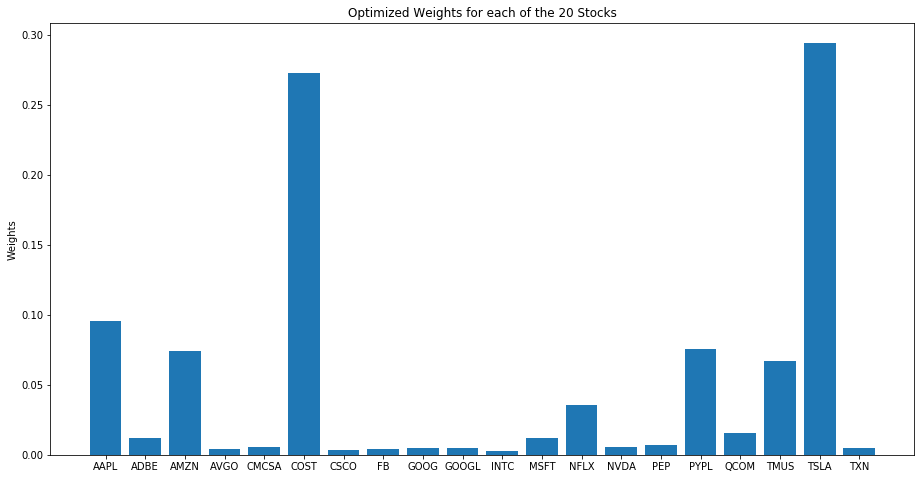

In [183]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_axes([0,0,1,1])
ax.bar(slist,optimized_weights_trustr)
ax.set_ylabel('Weights')
ax.set_title('Optimized Weights for each of the 20 Stocks')
plt.show()

#### Calculates the Sharpe Ratio given a portfolio and the respective weights

In [185]:
def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    xOptimalArray = x
    Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
    expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
    annRisk =   np.sqrt(Risk*756) 
    annRet = 756*np.array(expReturn) 
    maxSharpeRatio = (annRet)/annRisk 
    return maxSharpeRatio

In [190]:
print ("Sharpe Ratio using optimized weights by SLSQP")
print(f(optimized_weights_slsqp, meanReturns, covReturns, dailyriskfreerate, 20))
sr_slsqp = f(optimized_weights_slsqp, meanReturns, covReturns, dailyriskfreerate, 20)

Sharpe Ratio using optimized weights by SLSQP
3.0193712938660404


In [191]:
print ("Sharpe Ratio using optimized weights by TRUSTR")
print(f(optimized_weights_trustr, meanReturns, covReturns, dailyriskfreerate, 20))
sr_trustr = f(optimized_weights_trustr, meanReturns, covReturns, dailyriskfreerate, 20)

Sharpe Ratio using optimized weights by SLSQP
2.9659650065793706


In [192]:
print("Sharpe ratio using equally distribued weights : ")
xOptimalArray = np.ones(len(slist_df)) * (1.0 / len(slist_df))

print(f(xOptimalArray, meanReturns, covReturns, dailyriskfreerate, 20))
sr_default = f(xOptimalArray, meanReturns, covReturns, dailyriskfreerate, 20)

Sharpe ratio using equally distribued weights : 
2.02877038937064


In [195]:
rows, cols = (20, 20)
arr = [[0 for i in range(cols)] for j in range(rows)]
print(arr)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 

In [198]:
for i in range(len(arr)):
        for j in range(len(arr[i])):
            if i == j:
                arr[i][j] = 1
            else:
                arr[i][j] = 0
                
arr

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [202]:
results = []

for i in range(20):
    w = np.array(arr[i])
    result = f(w, meanReturns, covReturns, dailyriskfreerate, 20)
    results.append(result)
    
print(results)

[2.1582184563080866, 1.9352716435839983, 2.0421298430871726, 1.0689568717974836, 0.7323420535857338, 1.9335450216472816, 0.5327626370596525, 0.9558267787945179, 1.2020626835468096, 1.1894898342956919, 0.4357783160279403, 1.9838796525185585, 1.7101825834904871, 1.5561736412089047, 0.7437375356201053, 2.0512612193396835, 1.5293154229684442, 1.6885444949369879, 2.62404933084308, 1.0407769543270198]


In [208]:
srs = []
srs.append(sr_slsqp)
srs.append(sr_trustr)
srs.append(sr_default)
for i in results:
    srs.append(i)

lbl = ['shsqp', 'trustr', 'equal_distr']
for k in slist:
    lbl.append(k)

print(str(srs)+'\n')
print(lbl)

[3.0193712938660404, 2.9659650065793706, 2.02877038937064, 2.1582184563080866, 1.9352716435839983, 2.0421298430871726, 1.0689568717974836, 0.7323420535857338, 1.9335450216472816, 0.5327626370596525, 0.9558267787945179, 1.2020626835468096, 1.1894898342956919, 0.4357783160279403, 1.9838796525185585, 1.7101825834904871, 1.5561736412089047, 0.7437375356201053, 2.0512612193396835, 1.5293154229684442, 1.6885444949369879, 2.62404933084308, 1.0407769543270198]

['shsqp', 'trustr', 'equal_distr', 'AAPL', 'ADBE', 'AMZN', 'AVGO', 'CMCSA', 'COST', 'CSCO', 'FB', 'GOOG', 'GOOGL', 'INTC', 'MSFT', 'NFLX', 'NVDA', 'PEP', 'PYPL', 'QCOM', 'TMUS', 'TSLA', 'TXN']


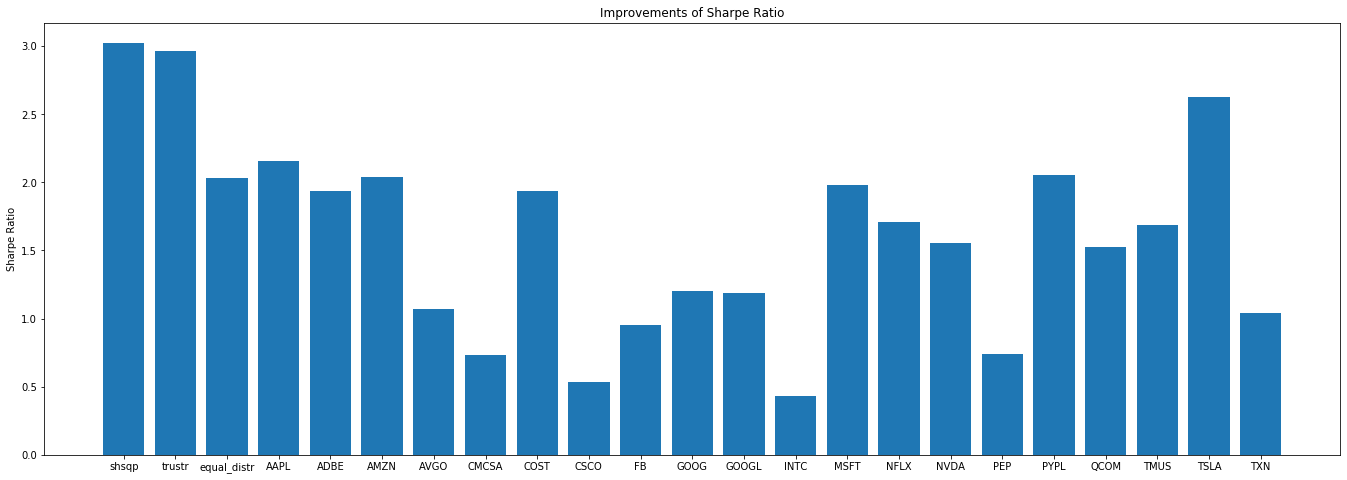

In [211]:
fig = plt.figure()
fig.set_size_inches(18, 6)
ax = fig.add_axes([0,0,1,1])
ax.bar(lbl,srs)
ax.set_ylabel('Sharpe Ratio')
ax.set_title('Improvements of Sharpe Ratio')
plt.show()

In [216]:
weights = optimized_weights_slsqp

portfolio_val = (normalized_prices * weights).sum(axis=1)
portfolio = pd.DataFrame(index=prices.index, data={'portfolio': portfolio_val})
risk = get_risk(portfolio)
ret = get_return(portfolio)
print(str(risk) + str(ret))

[0.02143067][0.00231647]


In [225]:
weights = optimized_weights_trustr

portfolio_val = (normalized_prices * weights).sum(axis=1)
portfolio = pd.DataFrame(index=prices.index, data={'portfolio': portfolio_val})
risk = get_risk(portfolio)
ret = get_return(portfolio)
print(str(risk) + str(ret))

[0.02189413][0.00232905]


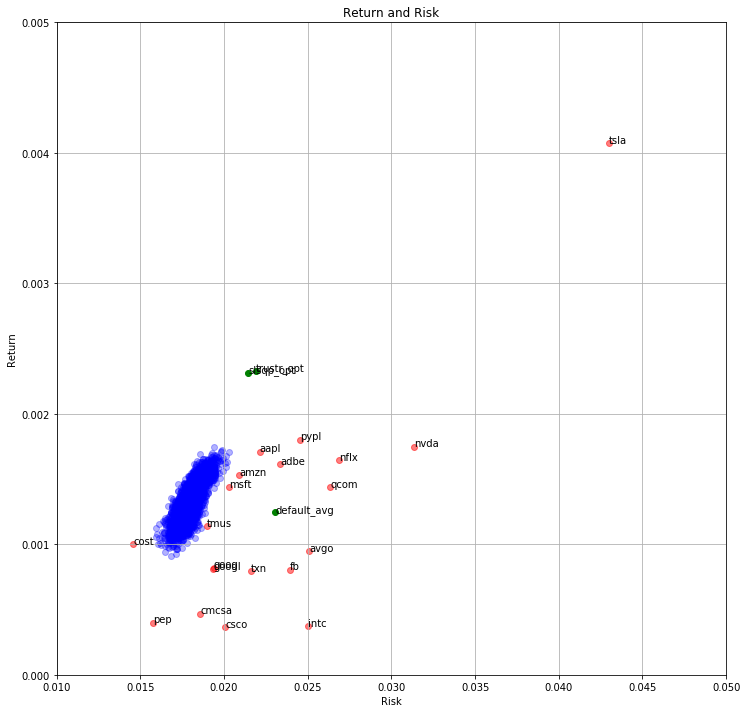

In [18]:
portfolio_risk_avg = portfolio_risk.mean()
portfolio_ret_avg = portfolio_return.mean()

comp_risk = [0.02143067]
comp_risk.append(portfolio_risk_avg)
comp_risk.append(0.02189413)

comp_ret = [0.00231647]
comp_ret.append(portfolio_ret_avg)
comp_ret.append(0.00232905)

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
ax.scatter(x=comp_risk, y=comp_ret, alpha=1, color='green') 
txts = ['slsqp_opt', 'default_avg', 'trustr_opt']
for i, txt in enumerate(txts):
    plt.annotate(txt, (comp_risk[i], comp_ret[i]))
#ax.scatter(x=portfolio_risk_avg, y=portfolio_return_avg, alpha=1, color='purple') 
ax.scatter(x=risk_all, y=return_all, alpha=0.3, color='blue') 
ax.set_xlim([0.01, 0.05])
ax.set_ylim([0, 0.005])
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')

for i, name in enumerate(slist_df): 
    ax.annotate(name, (portfolio_risk[i], portfolio_return[i]))
    
ax.scatter(x=portfolio_risk, y=portfolio_return, alpha=0.5, color='red') 
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return') 
ax.grid()
plt.show()